# Obiettivi

1. Scaricare 
0. D = lista death rate per paese
1. L = lista di tutti gli indicatori mondiali per paese
2. Per ogni x in L, M[x] = [indicatore per paese]
3. Per ogni x in L, C[x] = la coppia (covarianza(M[x], D) ,x)
4. C.sort(); rispetto alla covarianza
5. Stampa i primi cinque elementi di C e gli ultimi cinque elementi di C

In [1]:
import pandas as pd
import numpy as np
import world_bank_data as wb

## Indicatori mondiali per paese
Scaricati dalla world data bank

In [2]:
topics = wb.get_topics()
topics

,value,sourceNote
id,,
1,Agriculture & Rural Development,For the 70 percent of the world's poor who liv...
2,Aid Effectiveness,Aid effectiveness is the impact that aid has i...
3,Economy & Growth,Economic growth is central to economic develop...
4,Education,Education is one of the most powerful instrume...
5,Energy & Mining,The world economy needs ever-increasing amount...
6,Environment,Natural and man-made environmental resources –...
7,Financial Sector,An economy's financial markets are critical to...
8,Health,Improving health is central to the Millennium ...
9,Infrastructure,Infrastructure helps determine the success of ...


In [3]:
indicators = wb.get_indicators()
print(f"Number of indicators: {len(indicators)}")
indicators.head()

Number of indicators: 17338


,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty
1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of data from Nation...,Poverty
1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,LAC Equity Lab,The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,Poverty


In [4]:
wb.search_indicators("emissions")[10:]

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
EN.ATM.CO2E.CP.KT,CO2 emissions from cement production (thousand...,,Africa Development Indicators,Carbon dioxide emissions from cement productio...,"Food and Agriculture Organization, electronic ...",
EN.ATM.CO2E.EG.ZS,CO2 intensity (kg per kg of oil equivalent ene...,,World Development Indicators,Carbon dioxide emissions from solid fuel consu...,"Carbon Dioxide Information Analysis Center, En...","Climate Change,Environment"
EN.ATM.CO2E.FF.KT,"CO2 emissions from fossil-fuels, total (thousa...",,Africa Development Indicators,Fossil fuel is any hydrocarbon deposit that ca...,"Food and Agriculture Organization, electronic ...",
EN.ATM.CO2E.FF.ZS,CO2 emissions from fossil-fuels (% of total),,Africa Development Indicators,Fossil fuel is any hydrocarbon deposit that ca...,"Food and Agriculture Organization, electronic ...",
EN.ATM.CO2E.GDP,"CO2 emissions, industrial (kg per 1987 US$ of ...",,WDI Database Archives,,,
...,...,...,...,...,...,...
NY.ADJ.DPEM.GN.ZS,Adjusted savings: particulate emission damage ...,,World Development Indicators,Particulate emissions damage is the damage due...,World Bank staff estimates based on sources an...,"Economy & Growth,Environment"
NY.ADJ.SVNG.CD,"Adjusted net savings, including particulate em...",,World Development Indicators,Adjusted net savings are equal to net national...,World Bank staff estimates based on sources an...,"Economy & Growth,Environment"
NY.ADJ.SVNG.GN.ZS,"Adjusted net savings, including particulate em...",,World Development Indicators,Adjusted net savings are equal to net national...,World Bank staff estimates based on sources an...,"Economy & Growth,Environment"


In [5]:
s = wb.get_series('EN.ATM.CO2E.CP.KT', mrv=1, simplify_index=True)

In [6]:
type(s) # Tipo di un oggetto

pandas.core.series.Series

In [7]:
s

Country
Africa                                                   69104.854683
Algeria                                                   8976.816000
Angola                                                     898.415000
Benin                                                      748.068000
Botswana                                                     0.000000
Burkina Faso                                                14.668000
Burundi                                                      0.000000
Cameroon                                                          NaN
Cape Verde                                                   0.000000
Central African Republic                                     0.000000
Chad                                                         0.000000
Comoros                                                      0.000000
Congo, Dem. Rep.                                             0.000000
Congo, Rep.                                                220.020000
Cote d'Ivoir

In [8]:
# Scarichiamo alcuni indici ambientali
env_indicators = wb.get_indicators(topic=6)
# print("Indicatori:", len(env_indicators))
print(f"Indicatori: {len(env_indicators)}") #f-strings python>=3.7
env_indicators.head(3)

Indicatori: 139


,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
AG.LND.AGRI.ZS,Agricultural land (% of land area),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Chan..."
AG.LND.ARBL.ZS,Arable land (% of land area),,World Development Indicators,Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Chan..."
AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,,World Development Indicators,Rural land area below 5m is the total rural la...,Center for International Earth Science Informa...,"Agriculture & Rural Development ,Climate Chan..."


In [9]:
env_indicators["name"] # Selezioniamo la colonna "name", oltre agli id

id
AG.LND.AGRI.ZS                      Agricultural land (% of land area)
AG.LND.ARBL.ZS                            Arable land (% of land area)
AG.LND.EL5M.RU.K2    Rural land area where elevation is below 5 met...
AG.LND.EL5M.RU.ZS    Rural land area where elevation is below 5 met...
AG.LND.EL5M.UR.K2    Urban land area where elevation is below 5 met...
                                           ...                        
SH.STA.POIS.P5.MA    Mortality rate attributed to unintentional poi...
SH.STA.SMSS.RU.ZS    People using safely managed sanitation service...
SH.STA.SMSS.UR.ZS    People using safely managed sanitation service...
SH.STA.SMSS.ZS       People using safely managed sanitation service...
SH.STA.WASH.P5       Mortality rate attributed to unsafe water, uns...
Name: name, Length: 139, dtype: object

In [12]:
env_indicators.loc[:, ["name", "source"]]
# .loc: primo argomento è un range di righe
#       secondo argomento lista di colonne

,name,source
id,,
AG.LND.AGRI.ZS,Agricultural land (% of land area),World Development Indicators
AG.LND.ARBL.ZS,Arable land (% of land area),World Development Indicators
AG.LND.EL5M.RU.K2,Rural land area where elevation is below 5 met...,World Development Indicators
AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 met...,World Development Indicators
AG.LND.EL5M.UR.K2,Urban land area where elevation is below 5 met...,World Development Indicators
...,...,...
SH.STA.POIS.P5.MA,Mortality rate attributed to unintentional poi...,World Development Indicators
SH.STA.SMSS.RU.ZS,People using safely managed sanitation service...,World Development Indicators
SH.STA.SMSS.UR.ZS,People using safely managed sanitation service...,World Development Indicators


In [16]:
env_indicators.index # Lista degli indici (in questo caso gli id)

Index(['AG.LND.AGRI.ZS', 'AG.LND.ARBL.ZS', 'AG.LND.EL5M.RU.K2',
       'AG.LND.EL5M.RU.ZS', 'AG.LND.EL5M.UR.K2', 'AG.LND.EL5M.UR.ZS',
       'AG.LND.EL5M.ZS', 'AG.LND.FRST.K2', 'AG.LND.FRST.ZS', 'AG.LND.PRCP.MM',
       ...
       'SH.STA.ODFC.RU.ZS', 'SH.STA.ODFC.UR.ZS', 'SH.STA.ODFC.ZS',
       'SH.STA.POIS.P5', 'SH.STA.POIS.P5.FE', 'SH.STA.POIS.P5.MA',
       'SH.STA.SMSS.RU.ZS', 'SH.STA.SMSS.UR.ZS', 'SH.STA.SMSS.ZS',
       'SH.STA.WASH.P5'],
      dtype='object', name='id', length=139)

In [17]:
len(wb.get_series("AG.LND.FRST.K2", mrv=1)) # Numero di record in una Series / DataFrame

264

In [20]:
all_series = {}
for indicator in env_indicators.index:
    print(f"Downloading {indicator}")
    try:
        all_series[indicator] = wb.get_series(indicator, mrv=1)
    except Exception as e: # Se incontri un'eccezione
        print(f"Downloading {indicator} failed")
        pass # Fai finta di nulla

## Death rate COVID per paese
Per scaricarla utilizziamo un link dal [repo github](https://github.com/CSSEGISandData/COVID-19).

In [24]:
giorno = "03-21-2020"

csv_url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{giorno}.csv"

df = pd.read_csv(csv_url) # read_csv carica un csv (anche da file) come DataFrame
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-21T10:13:08,67800,3139,58946,30.9756,112.2707
1,NaN,Italy,2020-03-21T17:43:03,53578,4825,6072,41.8719,12.5674
2,NaN,Spain,2020-03-21T13:13:30,25374,1375,2125,40.4637,-3.7492
3,NaN,Germany,2020-03-21T20:43:02,22213,84,233,51.1657,10.4515
4,NaN,Iran,2020-03-21T11:13:12,20610,1556,7635,32.4279,53.6880
...,...,...,...,...,...,...,...,...
299,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
300,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000
301,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560
302,NaN,The Bahamas,2020-03-19T12:13:38,0,0,0,24.2500,-76.0000


In [30]:
df2 = df.loc[:, ["Country/Region", "Confirmed", "Deaths", "Recovered"]].groupby("Country/Region").sum() # Aggrego i dati per paese sommandoli

In [31]:
df2

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,24,0,1
Albania,76,2,2
Algeria,139,15,32
Andorra,88,0,1
Angola,2,0,0
...,...,...,...
Uzbekistan,43,0,0
Venezuela,70,0,0
Vietnam,94,0,17


In [34]:
df2["DeathRate"] = df2["Deaths"] / df2["Confirmed"]

In [38]:
df2[df2.index == "Italy"]

,Confirmed,Deaths,Recovered,DeathRate
Country/Region,,,,
Italy,53578,4825,6072,0.090056


In [39]:
df2[df2["Deaths"] > 100]

,Confirmed,Deaths,Recovered,DeathRate
Country/Region,,,,
China,81305,3259,71857,0.040084
France,14308,562,12,0.039279
Iran,20610,1556,7635,0.075497
Italy,53578,4825,6072,0.090056
"Korea, South",8799,102,1540,0.011592
Netherlands,3640,137,2,0.037637
Spain,25374,1375,2125,0.054189
US,25493,307,171,0.012043
United Kingdom,5067,234,67,0.046181


In [40]:
df2.corr() # Correlazioni tra le colonne di un dataframe

,Confirmed,Deaths,Recovered,DeathRate
Confirmed,1.000000,0.891287,0.803729,0.111450
Deaths,0.891287,1.000000,0.612275,0.151744
Recovered,0.803729,0.612275,1.000000,0.055919
DeathRate,0.111450,0.151744,0.055919,1.000000


In [41]:
df2.transpose() # Cambia l'ordine di righe e colonne

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
Confirmed,24.0,76.000000,139.000000,88.0,2.0,1.0,158.000000,160.0,1071.000000,2814.000000,...,1.0,47.00000,153.000000,5067.000000,110.0,43.0,70.0,94.0,2.0,3.0
Deaths,0.0,2.000000,15.000000,0.0,0.0,0.0,4.000000,0.0,7.000000,8.000000,...,0.0,3.00000,2.000000,234.000000,0.0,0.0,0.0,0.0,0.0,0.0
Recovered,1.0,2.000000,32.000000,1.0,0.0,0.0,3.000000,1.0,26.000000,9.000000,...,0.0,1.00000,38.000000,67.000000,0.0,0.0,0.0,17.0,0.0,0.0
DeathRate,0.0,0.026316,0.107914,0.0,0.0,0.0,0.025316,0.0,0.006536,0.002843,...,0.0,0.06383,0.013072,0.046181,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
import seaborn as sns

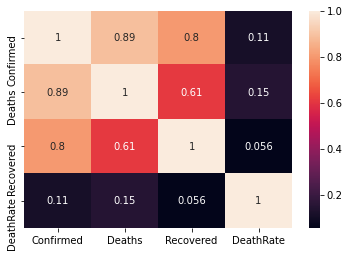

In [47]:
sns.heatmap(df2.corr(), annot=df2.corr())

1. Fare correlazioni tra indicatori vs deathrate
2. Quali sono i paesi più correlati rispetto alla deathrate

In [48]:
# Ogni serie vorrei aggiurne i dati al dataframe dei paesi
# Righe paesi, colonne deathrate + tutti i dati ausiliari
for serie_id, serie in all_series.items():
    print(serie)
    break
    # Problema: Matching tra i paesi

Country                         Series                              Year
Arab World                      Agricultural land (% of land area)  2016    36.610850
Caribbean small states          Agricultural land (% of land area)  2016     6.268000
Central Europe and the Baltics  Agricultural land (% of land area)  2016    46.715708
Early-demographic dividend      Agricultural land (% of land area)  2016    41.466296
East Asia & Pacific             Agricultural land (% of land area)  2016    47.783780
                                                                              ...    
Virgin Islands (U.S.)           Agricultural land (% of land area)  2016    11.428571
West Bank and Gaza              Agricultural land (% of land area)  2016    49.322261
Yemen, Rep.                     Agricultural land (% of land area)  2016    44.597231
Zambia                          Agricultural land (% of land area)  2016    32.063923
Zimbabwe                        Agricultural land (% of land area) 

## Raggruppamento di paesi per deathrate


In [72]:
df3 = df2[~df2["DeathRate"].isnull()].loc[:, ["DeathRate"]]
df3

,DeathRate
Country/Region,
Afghanistan,0.000000
Albania,0.026316
Algeria,0.107914
Andorra,0.000000
Angola,0.000000
...,...
Uzbekistan,0.000000
Venezuela,0.000000
Vietnam,0.000000


In [98]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

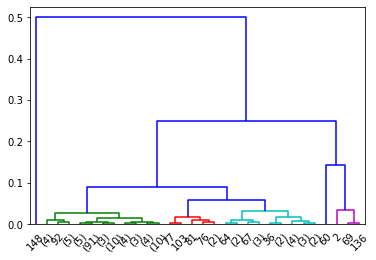

In [101]:
data_dist = pdist(df3, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp', color_threshold=0.05)

In [102]:
import hdbscan

In [121]:
ndf = df[~(df["Deaths"] / df["Confirmed"]).isnull()].copy()
ndf["DeathRate"] = ndf["Deaths"] / ndf["Confirmed"]

In [123]:
cluster = hdbscan.HDBSCAN()
cluster.fit(ndf.loc[:, ["DeathRate"]])

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

/home/trenta3/.anaconda3/envs/ds/lib/python3.8/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


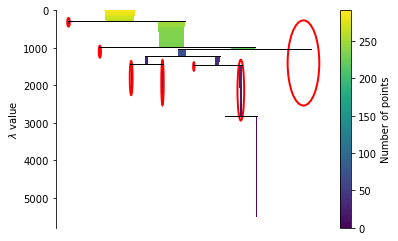

In [124]:
cluster.condensed_tree_.plot(select_clusters=True)

In [126]:
cluster.labels_

array([-1, -1, -1,  5, -1, -1,  6,  4,  4, -1,  0, -1,  5,  5, -1,  4,  6,
        1,  4,  4, -1,  1,  2,  5, -1,  5,  0,  2,  6, -1, -1, -1,  5,  3,
        3, -1,  4,  4,  4, -1,  2, -1, -1,  4,  6,  2, -1, -1, -1, -1, -1,
        4, -1, -1,  2,  5, -1,  4,  6, -1,  5,  6,  2,  4,  5,  3,  3,  5,
        2,  4,  1, -1, -1,  2,  5,  5,  5,  0,  4, -1,  3,  2,  4,  4,  2,
        2,  2, -1,  6,  4,  6,  2,  6, -1,  4, -1, -1,  6,  4,  2,  6,  1,
        0,  1,  4,  2, -1,  4,  4,  4,  4, -1, -1, -1, -1, -1,  2, -1,  2,
        2,  0, -1,  2,  2,  3,  1, -1,  1,  2,  0,  0,  2,  4,  4,  2,  4,
        2,  0,  2,  2,  2,  2,  4,  4,  2,  4, -1,  2, -1,  4,  2,  0,  2,
        2,  2,  2,  2,  2,  0,  1,  0,  2,  1,  2,  2,  2,  1,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  0,  2, -1,  2,  2,
        2, -1,  2,  2, -1,  2,  2,  2,  2, -1,  2, -1,  2, -1,  2,  2,  2,
        2, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,
        2,  2,  2,  2,  2

In [127]:
ndf["Label"] = cluster.labels_

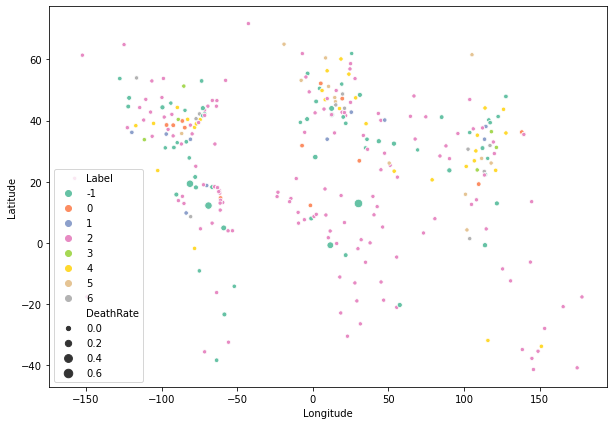

In [133]:
plt.figure(figsize=(10, 7))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=ndf, y="Latitude", x="Longitude", hue="Label", size="DeathRate", palette="Set2", cmap=cmap)